In [2]:
import sys
print("Python version: {}".format(sys.version))

import pandas as pd
print("pandas version: {}".format(pd.__version__))

import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))

import numpy as np
print("NumPy version: {}".format(np.__version__))

import scipy as sp
print("SciPy version: {}".format(sp.__version__))

import IPython
from IPython import display
print("IPython version: {}".format(IPython.__version__))

import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

import random
import time
import warnings
warnings.filterwarnings('ignore')
print('-'*30)

import os
import glob
glob.glob(os.getcwd()+'\\*.csv')

Python version: 3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
pandas version: 0.23.4
matplotlib version: 3.0.2
NumPy version: 1.16.0
SciPy version: 1.2.0
IPython version: 6.2.1
scikit-learn version: 0.20.2
------------------------------


['C:\\Users\\yhq34\\Desktop\\Gavin\\Python\\titanic_survival_prediction\\gender_submission.csv',
 'C:\\Users\\yhq34\\Desktop\\Gavin\\Python\\titanic_survival_prediction\\test.csv',
 'C:\\Users\\yhq34\\Desktop\\Gavin\\Python\\titanic_survival_prediction\\train.csv']

In [3]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [4]:
data_raw = pd.read_csv('train.csv')
data_val = pd.read_csv('test.csv')

data1 = data_raw.copy(deep=True)

data_cleaner = [data1, data_val]

print(data_raw.info())
# data_raw.head()
# data_raw.tail()
data_raw.sample(10)
# data_raw.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S
534,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
833,834,0,3,"Augustsson, Mr. Albert",male,23.0,0,0,347468,7.8542,NaN,S
591,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,36947,78.2667,D20,C
646,647,0,3,"Cor, Mr. Liudevit",male,19.0,0,0,349231,7.8958,NaN,S
242,243,0,2,"Coleridge, Mr. Reginald Charles",male,29.0,0,0,W./C. 14263,10.5000,NaN,S
701,702,1,1,"Silverthorne, Mr. Spencer Victor",male,35.0,0,0,PC 17475,26.2875,E24,S
330,331,1,3,"McCoy, Miss. Agnes",female,NaN,2,0,367226,23.2500,NaN,Q
451,452,0,3,"Hagland, Mr. Ingvald Olai Olsen",male,NaN,1,0,65303,19.9667,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C


In [5]:
print('Training set columns with null values: \n', data1.isnull().sum())
print("-"*10)
print('Testing set columns with null values: \n', data_val.isnull().sum())
print("-"*10)
data_raw.describe(include='all')

Training set columns with null values: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Testing set columns with null values: 
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Vanden Steen, Mr. Leo Peter",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
for dataset in data_cleaner:
    #complete missing age with median
    dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
    
    #complete missing embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)
    
    #complete missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace=True)

In [7]:
drop_column = ['PassengerId', 'Cabin', 'Ticket']
data1.drop(drop_column, axis=1, inplace=True)

print(data1.isnull().sum())
print('-'*10)
print(data_val.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [8]:
for dataset in data_cleaner:
    #calculate family size
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
    #is alone?
    dataset['IsAlone'] = 1
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0
    
    #get the person's title from variable, name
    dataset['Title'] = dataset['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
    
    #binning fares by quartiles
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    
    #binning age in 5 equally spaced bins
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)

In [9]:
stat_min = 10
title_names = data1['Title'].value_counts() < stat_min
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)

print(data1['Title'].value_counts())
print('-'*10)

data1.info()
data_val.info()
data1.sample(10)

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Title         891 non-null object
FareBin       891 non-null category
AgeBin        891 non-null category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
238,0,2,"Pengelly, Mr. Frederick William",male,19.0,0,0,10.5000,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
520,1,1,"Perreault, Miss. Anne",female,30.0,0,0,93.5000,S,1,1,Miss,"(31.0, 512.329]","(16.0, 32.0]"
254,0,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",female,41.0,0,2,20.2125,S,3,0,Mrs,"(14.454, 31.0]","(32.0, 48.0]"
120,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,73.5000,S,3,0,Mr,"(31.0, 512.329]","(16.0, 32.0]"
654,0,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,6.7500,Q,1,1,Miss,"(-0.001, 7.91]","(16.0, 32.0]"
297,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,151.5500,S,4,0,Miss,"(31.0, 512.329]","(-0.08, 16.0]"
709,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,28.0,1,1,15.2458,C,3,0,Master,"(14.454, 31.0]","(16.0, 32.0]"
386,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,46.9000,S,8,0,Master,"(31.0, 512.329]","(-0.08, 16.0]"
676,0,3,"Sawyer, Mr. Frederick Charles",male,24.5,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
193,1,2,"Navratil, Master. Michel M",male,3.0,1,1,26.0000,S,3,0,Master,"(14.454, 31.0]","(-0.08, 16.0]"


In [10]:
label = LabelEncoder()
for dataset in data_cleaner:
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])

#define y variable
Target = ['Survived']

#define original x's
data1_x = ['Sex','Pclass','Embarked','Title','SibSp','Parch','Age','Fare','FamilySize','IsAlone']
data1_x_calc = ['Sex_Code','Pclass','Embarked_Code','Title_Code','SibSp','Parch','Age','Fare']
data1_xy = Target + data1_x
print('Original X Y: ', data1_xy)

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone']


In [11]:
data1_x_bin = ['Sex_Code','Pclass','Embarked_Code','Title_Code','FamilySize','AgeBin_Code','FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin)

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']


In [12]:
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy)

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs']


In [13]:
data1_dummy.head()

,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0


In [14]:
print('Training set columns with null values: \n', data1.isnull().sum())
print('-'*15)
print(data1.info())
print('-'*15)

print('Testing set columns with null values: \n', data_val.isnull().sum())
print('-'*15)
print(data_val.info())

Training set columns with null values: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
FareBin_Code     0
AgeBin_Code      0
dtype: int64
---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         891 non-null object
FamilySize       891 non-null int64
IsAlone          891 non-null int64
Title            891 non-null object
FareBin          891 non

In [15]:
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state=0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target], random_state=0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state=0)

print('Data1 Shape: {}'.format(data1.shape))
print('Train1 Shape: {}'.format(train1_x.shape))
print('Test1 Shape: {}'.format(test1_x.shape))



Data1 Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


In [16]:
for x in data1_x:
    if data1[x].dtype != 'float64':
        print('Survival Rate by: {} \n'.format(x))
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*25)

print(pd.crosstab(data1['Title'], data1[Target[0]]))

Survival Rate by: Sex 

      Sex  Survived
0  female  0.742038
1    male  0.188908
-------------------------
Survival Rate by: Pclass 

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
-------------------------
Survival Rate by: Embarked 

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
-------------------------
Survival Rate by: Title 

    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
-------------------------
Survival Rate by: SibSp 

   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
-------------------------
Survival Rate by: Parch 

   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
-------------------------
Survival Rate by: FamilySize 

   Fami

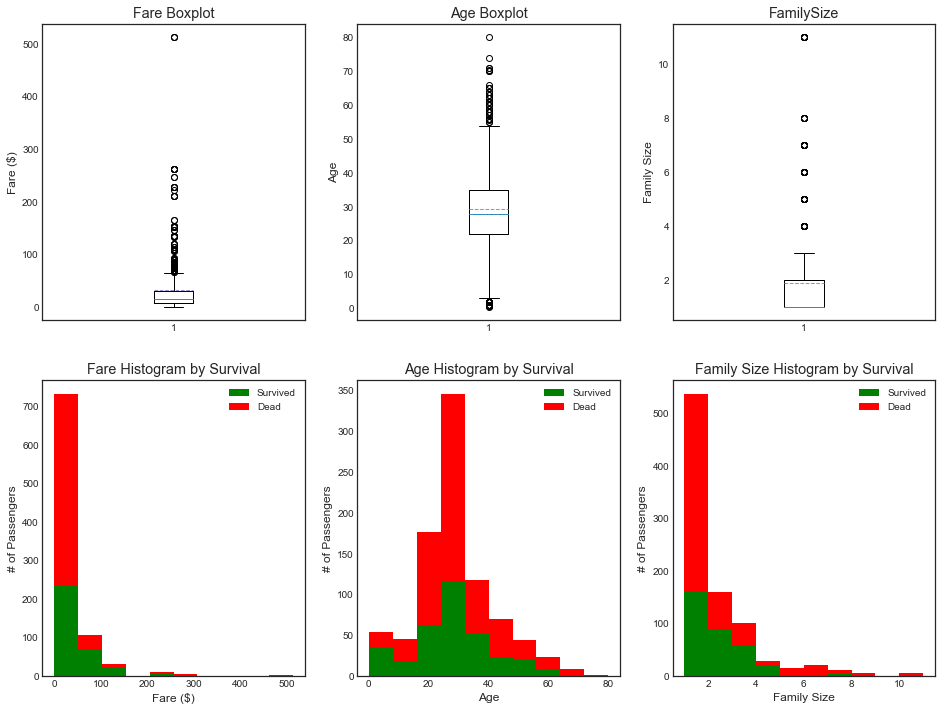

In [66]:
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=data1['Fare'], showmeans=True, meanline=True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(232)
plt.boxplot(x=data1['Age'], showmeans=True, meanline=True)
plt.title('Age Boxplot')
plt.ylabel('Age')

plt.subplot(233)
plt.boxplot(x=data1['FamilySize'], showmeans=True, meanline=True)
plt.title('FamilySize')
plt.ylabel('Family Size')

plt.subplot(234)
plt.hist(x=[data1[data1['Survived']==1]['Fare'], data1[data1['Survived']==0]['Fare']], stacked=True, color=['g','r'], label=['Survived', 'Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(235)
plt.hist(x=[data1[data1['Survived']==1]['Age'], data1[data1['Survived']==0]['Age']], stacked=True, color=['g','r'], label=['Survived', 'Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(236)
plt.hist(x=[data1[data1['Survived']==1]['FamilySize'], data1[data1['Survived']==0]['FamilySize']], stacked=True, color=['g','r'], label=['Survived','Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size')
plt.ylabel('# of Passengers')
plt.legend()

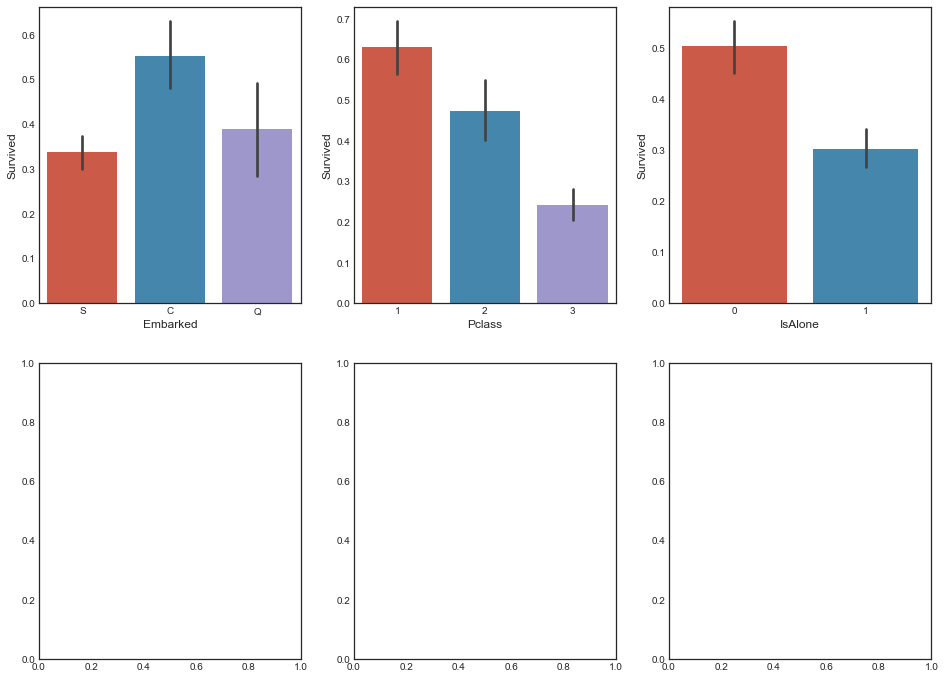

In [74]:
fig, axes = plt.subplots(2, 3, figsize=(16,12))

sns.barplot(x='Embarked', y='Survived', data=data1, ax=axes[0,0])
sns.barplot(x='Pclass', y='Survived', data=data1, ax=axes[0,1])
sns.barplot(x='IsAlone', y='Survived', data=data1, ax=axes[0,2])